-------------------Project ON ZOMATO DATA-----------------------

In [264]:
#IMPORTED THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

In [265]:
df=pd.read_excel("resturant.xlsx")

In [266]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [267]:
zomato_data=df.drop(['url','address','phone','menu_item','listed_in(city)'],axis=1) #axis=1 means columm
zomato_data.head(2)


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet


In [268]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  reviews_list                 51717 non-null  object 
 11  listed_in(type)              51717 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [269]:
zomato_data.isna().sum() # isna checks null values and sum() sums up the values from if there is any.

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
dtype: int64

In [270]:
def clean_data(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9- ]',name):
            my_str=re.findall(r'[a-zA-Z0-9- ]',name)
            after_join="".join(my_str)
            return after_join
        else:
            return name

In [271]:
zomato_data["name"]=zomato_data["name"].apply(clean_data) # here we created clean name column by regex above and apply here on all
#on all data.

In [272]:
zomato_data["name"]

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712       Best Brews - Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 51717, dtype: object

In [273]:
def reviews(rev):
    if isinstance(rev,str):
        if re.findall(r'[a-zA-Z0-9 ].',rev):
            new=re.findall(r'[a-zA-Z0-9 ].',rev)# here extracted the data required data
            clean="".join(new) # joined the extracted words
            clean_data=re.sub(r'x[()[]a-fA-F0-9\?]{2}|x[a-fA-F0-9\?]{2}','',clean) # replaced the data into nothing
            n=re.sub(r'[\\\'\:\?]','',clean_data) #again leftover things replaced into '' nothing
            new_clean=re.sub(r'[^\x00-\x7F]+','',n) #here also replaced the leftover codes into nothing ''
            return new_clean
    else:
        return rev

In [274]:
zomato_data["Comments"]=zomato_data["reviews_list"].apply(reviews)

In [275]:
zomato_data=zomato_data.drop(['reviews_list'],axis=1)

In [276]:
zomato_data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Comments
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Rated 4.0 RATEDn Had been here for dinner wit...
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,"Rated 4.0 ""RATEDn Great food and proper Karna..."
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Rated 4.0 RATEDn Very good restaurant in neig...


In [277]:
zomato_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [278]:
def new_data(rate):
    if rate=="NEW" or rate=='-':
        return np.nan
    else:
        rates=float(str(rate).split('/')[0])
        return rates


In [279]:
zomato_data['rate']=zomato_data['rate'].apply(new_data)
zomato_data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [280]:
zomato_data["rate"]=zomato_data["rate"].round(1)

In [281]:
zomato_data['rate'].mean()

3.700448817952718

In [282]:
zomato_data['rate'].fillna(zomato_data['rate'].mean(),inplace=True)

In [283]:
#zomato_data['location'].unique()

In [284]:
zomato_data['location'].fillna("unknown",inplace=True)

In [285]:
zomato_data['rest_type'].isna().sum()

227

In [286]:
zomato_data['rest_type'].fillna("unknown",inplace=True)

In [287]:
zomato_data.isna().sum()

name                              14
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
Comments                        7595
dtype: int64

In [288]:
zomato_data['dish_liked'].fillna("unknown",inplace=True)

In [289]:
zomato_data['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                              unknown
51713                                              unknown
51714                                              unknown
51715                         Cocktails, Pizza, Buttermilk
51716                                              unknown
Name: dish_liked, Length: 51717, dtype: object

In [290]:
zomato_data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [291]:
zomato_data['cuisines'].fillna("unknown",inplace=True)

In [292]:
import re

In [293]:
zomato_data['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [294]:
zomato_data['approx_cost(for two people)'].fillna(zomato_data['approx_cost(for two people)'].mean(),inplace=True)

In [295]:
zomato_data.rename(columns={'approx_cost(for two people)':'Price'},inplace=True) # renamed column approx_cost(for two people) to Price

In [296]:
zomato_data.rename(columns={'name':'Restaurant_name'},inplace=True) # renamed column approx_cost(for two people) to Price

In [297]:
zomato_data.rename(columns={'listed_in(type)':'Rest_service_Type'},inplace=True) # renamed column approx_cost(for two people) to Price

In [298]:
zomato_data.rename(columns={'approx_cost(for two people)':'Price'},inplace=True)

In [299]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_name    51703 non-null  object 
 1   online_order       51717 non-null  object 
 2   book_table         51717 non-null  object 
 3   rate               51717 non-null  float64
 4   votes              51717 non-null  int64  
 5   location           51717 non-null  object 
 6   rest_type          51717 non-null  object 
 7   dish_liked         51717 non-null  object 
 8   cuisines           51717 non-null  object 
 9   Price              51717 non-null  float64
 10  Rest_service_Type  51717 non-null  object 
 11  Comments           44122 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


In [300]:
zomato_data.isna().sum()

Restaurant_name        14
online_order            0
book_table              0
rate                    0
votes                   0
location                0
rest_type               0
dish_liked              0
cuisines                0
Price                   0
Rest_service_Type       0
Comments             7595
dtype: int64

In [301]:
zomato_data['Restaurant_name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel '],
      dtype=object)

In [302]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_name    51703 non-null  object 
 1   online_order       51717 non-null  object 
 2   book_table         51717 non-null  object 
 3   rate               51717 non-null  float64
 4   votes              51717 non-null  int64  
 5   location           51717 non-null  object 
 6   rest_type          51717 non-null  object 
 7   dish_liked         51717 non-null  object 
 8   cuisines           51717 non-null  object 
 9   Price              51717 non-null  float64
 10  Rest_service_Type  51717 non-null  object 
 11  Comments           44122 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


In [303]:
zomato_data["Price"]=zomato_data["Price"].astype(int)

In [304]:
zomato_data['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [305]:
zomato_data["Restaurant_name"].fillna("Unknown",inplace=True)

In [306]:
zomato_data["Restaurant_name"].isnull().sum()
# to check the null value name in the column.

0

In [307]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_name    51717 non-null  object 
 1   online_order       51717 non-null  object 
 2   book_table         51717 non-null  object 
 3   rate               51717 non-null  float64
 4   votes              51717 non-null  int64  
 5   location           51717 non-null  object 
 6   rest_type          51717 non-null  object 
 7   dish_liked         51717 non-null  object 
 8   cuisines           51717 non-null  object 
 9   Price              51717 non-null  int32  
 10  Rest_service_Type  51717 non-null  object 
 11  Comments           44122 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 4.5+ MB


In [308]:
zomato_data=zomato_data.assign(dish_liked=zomato_data.dish_liked.str.split(",")).explode("dish_liked")
zomato_data=zomato_data.assign(rest_type=zomato_data.rest_type.str.split(",")).explode("rest_type")
zomato_data=zomato_data.assign(cuisines=zomato_data.cuisines.str.split(",")).explode("cuisines")
zomato_data.head(5)
#here I used explode function to make diff row for each column from cuisine,rest_type and dish_likedby spliting from comma

,Restaurant_name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Price,Rest_service_Type,Comments
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Pasta,North Indian,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Pasta,Mughlai,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Pasta,Chinese,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Lunch Buffet,North Indian,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Lunch Buffet,Mughlai,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...


In [309]:
dish_data=zomato_data['dish_liked'].str.split(",").explode().str.strip() #exploded the dish liked column to get insight from it


In [310]:
dish_data=dish_data.value_counts()


In [311]:
dish_data=dish_data[1:]
dish_data

dish_liked
Cocktails            15398
Pasta                15103
Pizza                13503
Burgers              13173
Mocktails             9053
                     ...  
Kesar Badam Kulfi        1
Seaweed Salad            1
Tiranga Paratha          1
Roast Pork Chilli        1
Potato Bun               1
Name: count, Length: 2792, dtype: int64

In [312]:
zomato_data['dish_liked'].unique()

array(['Pasta', ' Lunch Buffet', ' Masala Papad', ...,
       ' Chicken Pepperoni', ' Chicken Teriyaki Bao',
       ' Vegetable Dumplings'], dtype=object)

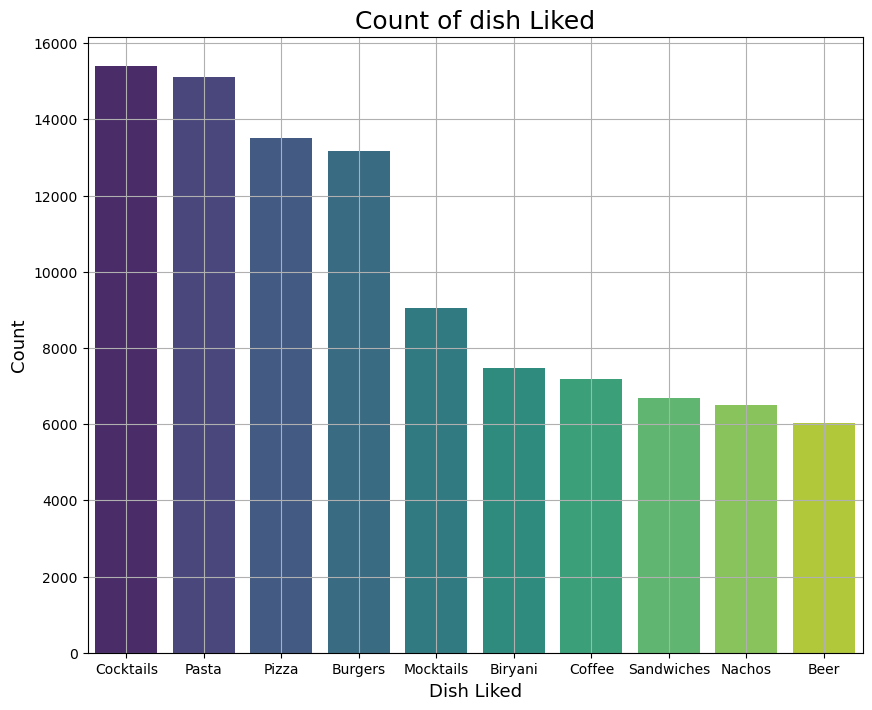

In [313]:
 plt.figure(figsize=(10,8))
sns.barplot(data=dish_data.head(10),palette='viridis')
plt.title("Count of dish Liked",fontsize=18)
plt.xticks(fontsize=10)
plt.xlabel("Dish Liked",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.grid()
plt.show()

In [314]:
rest_data=zomato_data['rest_type'].str.split(",").explode().str.strip() #exploded the rest_type column to get insight from it
rest_data

0        Casual Dining
0        Casual Dining
0        Casual Dining
0        Casual Dining
0        Casual Dining
             ...      
51716              Bar
51716              Bar
51716    Casual Dining
51716    Casual Dining
51716    Casual Dining
Name: rest_type, Length: 541191, dtype: object

In [315]:
r_data=rest_data.value_counts()
r_data

rest_type
Casual Dining     196457
Quick Bites        99624
Cafe               81352
Bar                39860
Dessert Parlor     23250
Pub                20687
Delivery           19711
Bakery             10381
Microbrewery        9184
Lounge              7930
Beverage Shop       7380
Takeaway            7205
Fine Dining         6521
Sweet Shop          3959
Food Court          3540
unknown             1142
Mess                1032
Kiosk                733
Club                 700
Irani Cafee          210
Food Truck           196
Dhaba                 74
Confectionery         50
Meat Shop              8
Bhojanalya             3
Pop Up                 2
Name: count, dtype: int64

In [316]:
rest_data.nunique()

26

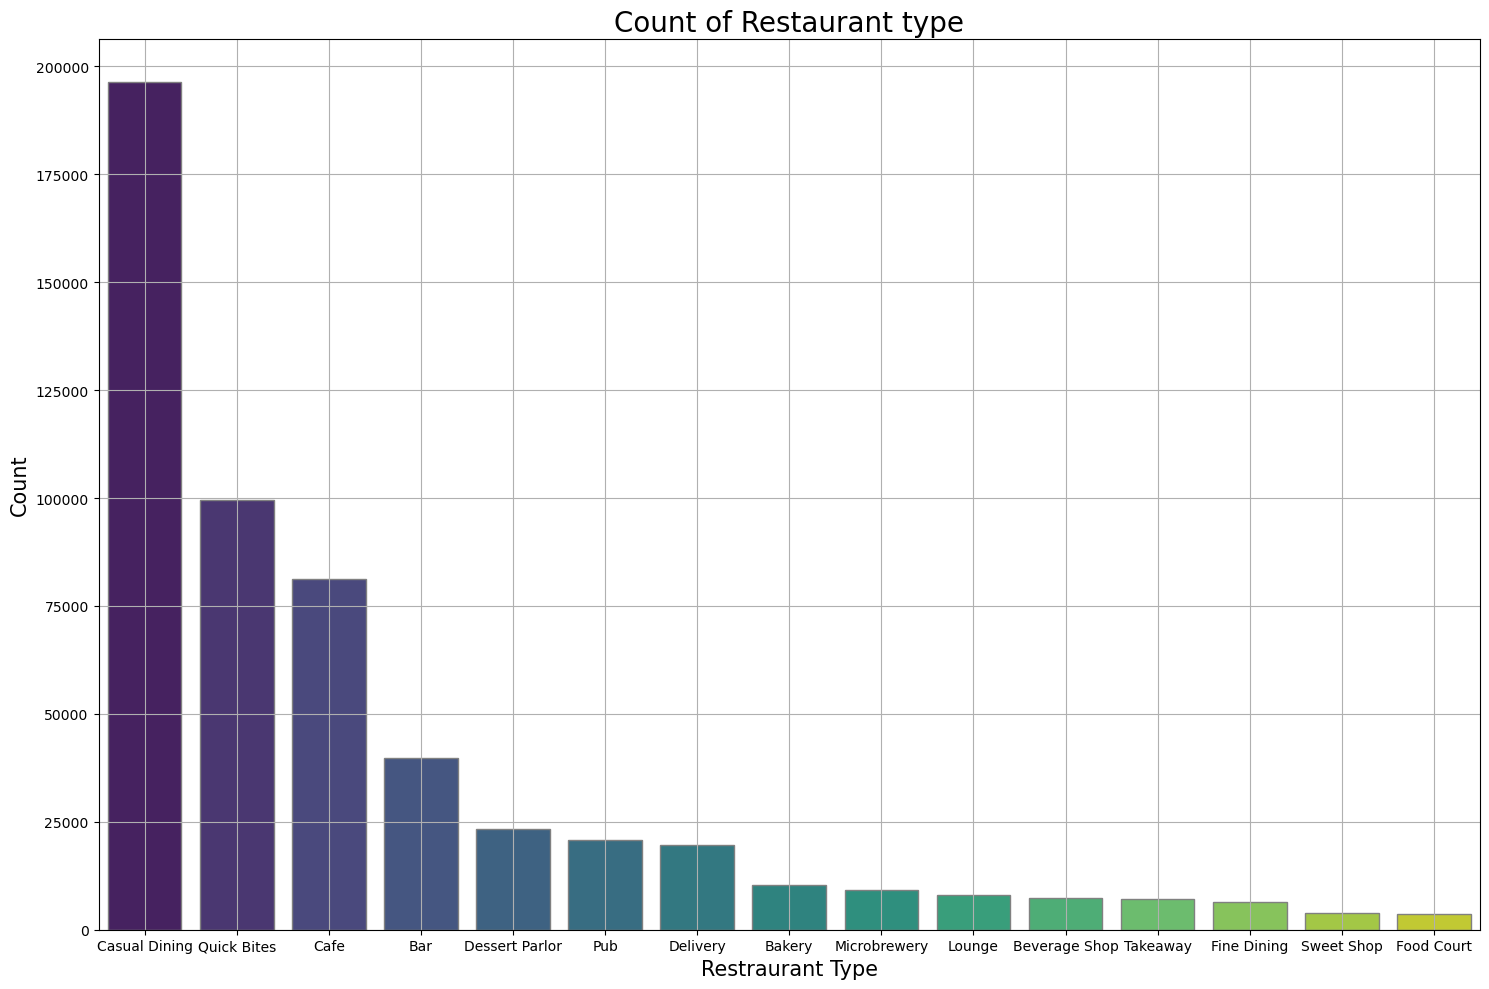

In [317]:
plt.figure(figsize=(15,10))
sns.barplot(data=r_data.head(15),palette='viridis',edgecolor='gray')
plt.title("Count of Restaurant type",fontsize=20)
plt.xticks(fontsize=10)
plt.xlabel("Restraurant Type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [318]:
cuisines_data=zomato_data['cuisines'].str.split(",").explode().str.strip()
cuisines_data

0        North Indian
0             Mughlai
0             Chinese
0        North Indian
0             Mughlai
             ...     
51716    North Indian
51716     Continental
51716     Finger Food
51716    North Indian
51716     Continental
Name: cuisines, Length: 541191, dtype: object

In [319]:
cuisines=cuisines_data.value_counts().head(20)
cuisines

cuisines
North Indian    77630
Chinese         54850
Continental     39966
Cafe            31358
Fast Food       25074
Italian         23477
Desserts        22177
South Indian    21564
Beverages       18663
Biryani         17827
Pizza           14233
Burger          11764
American        11193
Asian            9961
Seafood          9483
Finger Food      9109
Street Food      9050
Bakery           8870
Salad            8337
Mughlai          7128
Name: count, dtype: int64

In [320]:
cuisines_data.nunique()

108

In [321]:
zomato_data['cuisines'].nunique()

191

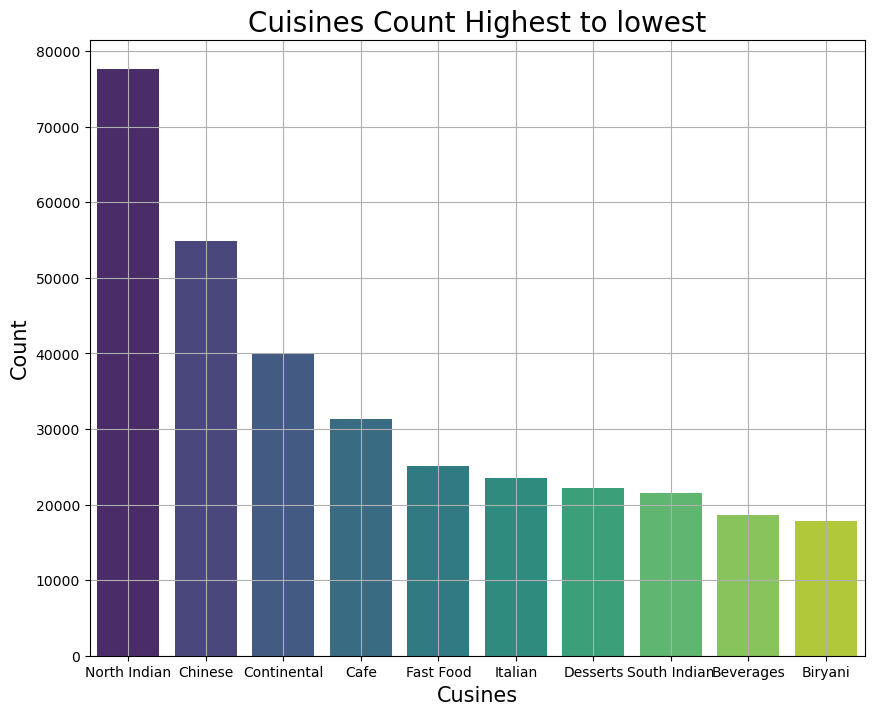

In [322]:
plt.figure(figsize=(10,8))
sns.barplot(data=cuisines.head(10),palette='viridis')
plt.title("Cuisines Count Highest to lowest",fontsize=20)
plt.xticks(fontsize=10)
plt.xlabel("Cusines",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

In [323]:
highest_by_avg=zomato_data.groupby(["cuisines","Rest_service_Type"])[["Price"]].mean().sort_values(by="Price",ascending=False).head(5)

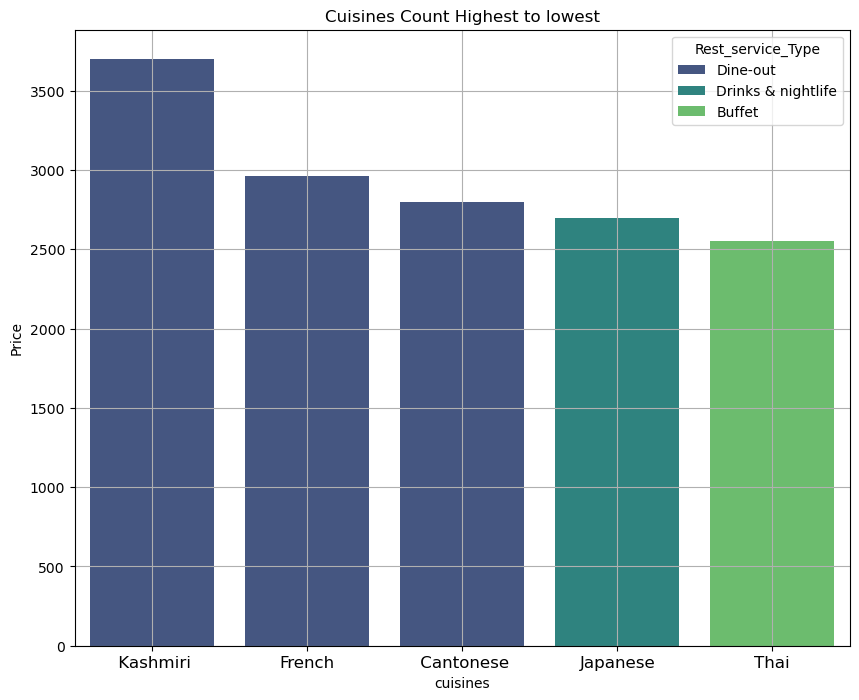

In [324]:
plt.figure(figsize=(10,8))
sns.barplot(data=highest_by_avg.head(10),x="cuisines",y="Price",palette='viridis',hue="Rest_service_Type")
plt.title("Cuisines Count Highest to lowest")
plt.xticks(fontsize=12)
plt.grid()
plt.show()

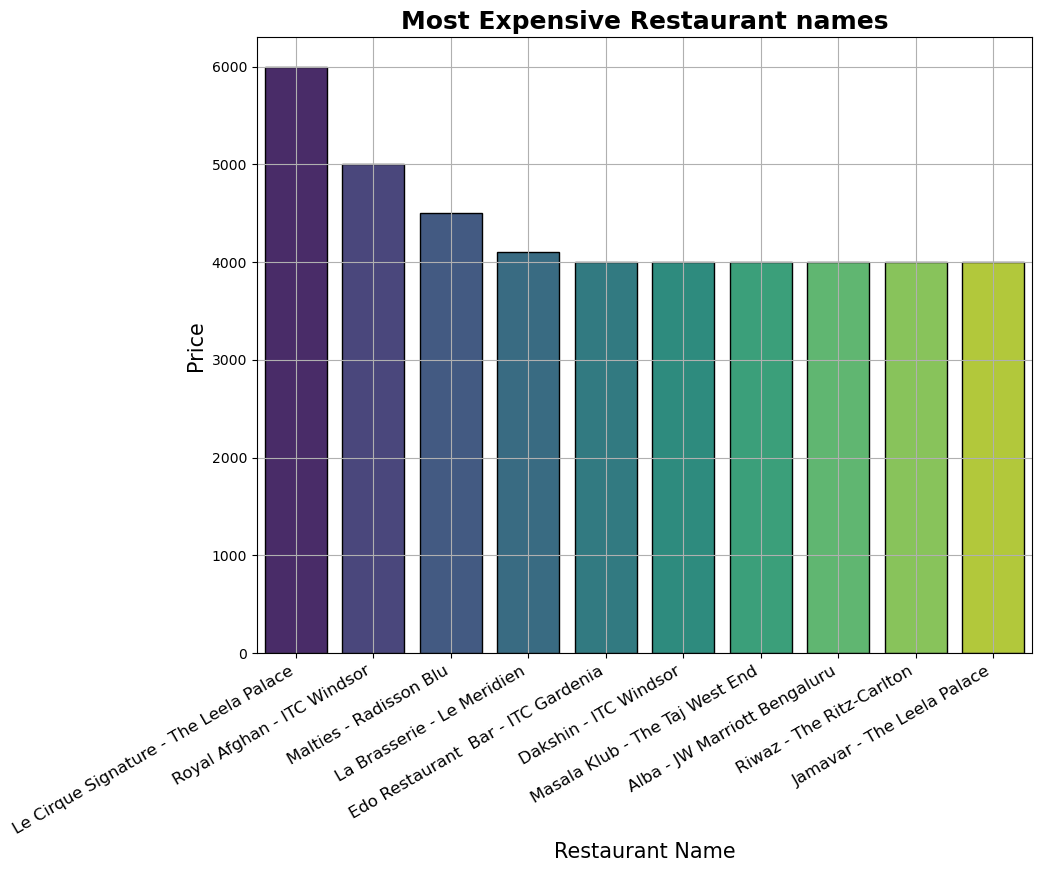

In [325]:
# Q.1 Find out 10 Most Expensive Restaurant name by price?
most_exp=zomato_data.loc[zomato_data.groupby('Restaurant_name')['Price'].idxmax()].sort_values(by="Price",ascending=False)
most_exp=most_exp[['Restaurant_name','Price']].drop_duplicates(subset='Restaurant_name')
plt.figure(figsize=(10,8))
sns.barplot(data=most_exp.head(10),x="Restaurant_name",y="Price",palette='viridis',edgecolor='black')
plt.title("Most Expensive Restaurant names",fontsize=18,fontweight='bold')
plt.xlabel("Restaurant Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation=30,ha='right',fontsize=12)
plt.grid()
plt.show()

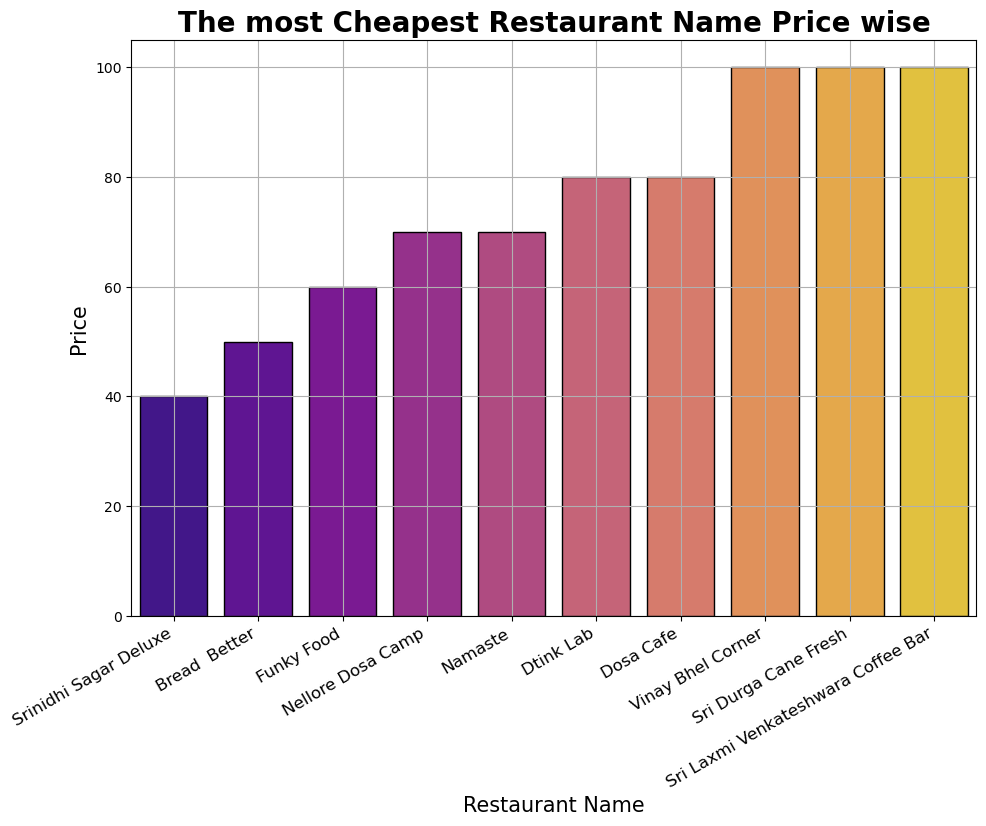

In [326]:
# Q.2 Find out 10 Most Cheapest Restaurant names by price?
most_cheap=zomato_data.loc[zomato_data.groupby('Restaurant_name')['Price'].idxmax()].sort_values(by="Price",ascending=True)
most_cheap=most_cheap[['Restaurant_name','Price']].drop_duplicates(subset='Restaurant_name')


plt.figure(figsize=(10,8))
sns.barplot(data=most_cheap.head(10),y='Price',x='Restaurant_name',palette='plasma',edgecolor='black')
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.title("The most Cheapest Restaurant Name Price wise",fontsize=20,fontweight='bold')
plt.xlabel("Restaurant Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

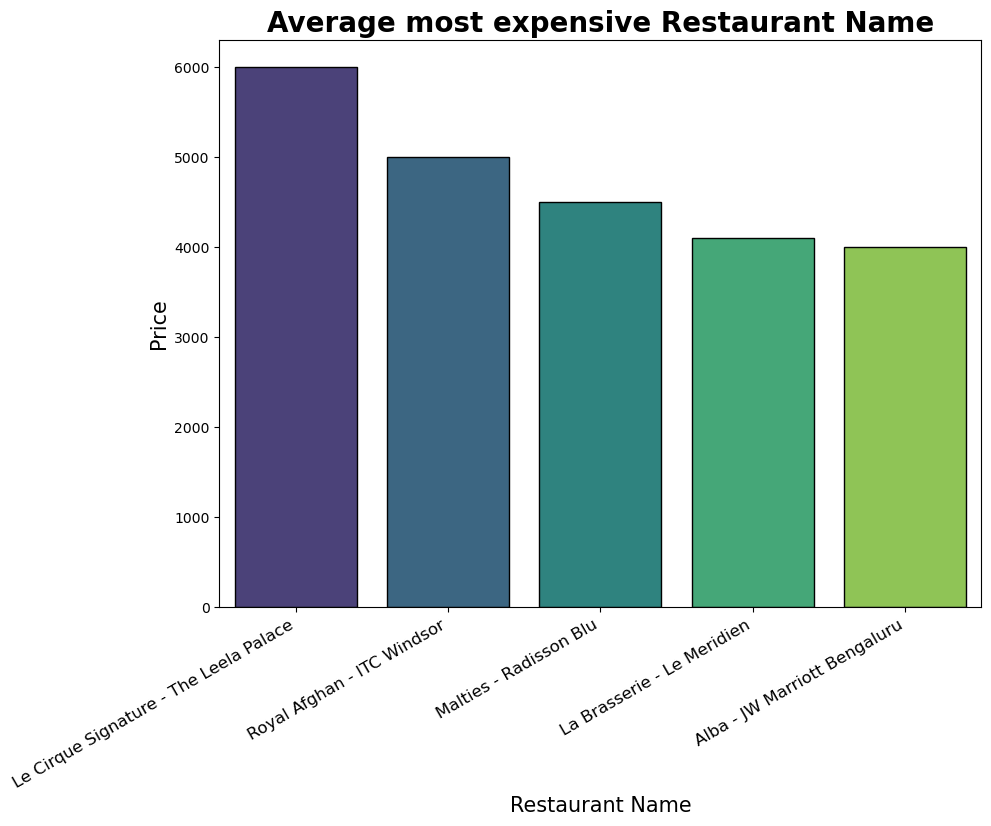

In [327]:
#Q.3 5 Average Top most Expensive restaurant
avg_most_exp=zomato_data.groupby('Restaurant_name')[['Price']].mean().sort_values(by="Price",ascending=False).head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=avg_most_exp,y='Price',x='Restaurant_name',palette='viridis',edgecolor='black')
plt.xticks(rotation=30,ha='right',fontsize=12)
plt.tight_layout()
plt.xlabel("Restaurant Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Average most expensive Restaurant Name",fontsize=20,fontweight='bold')
plt.show()

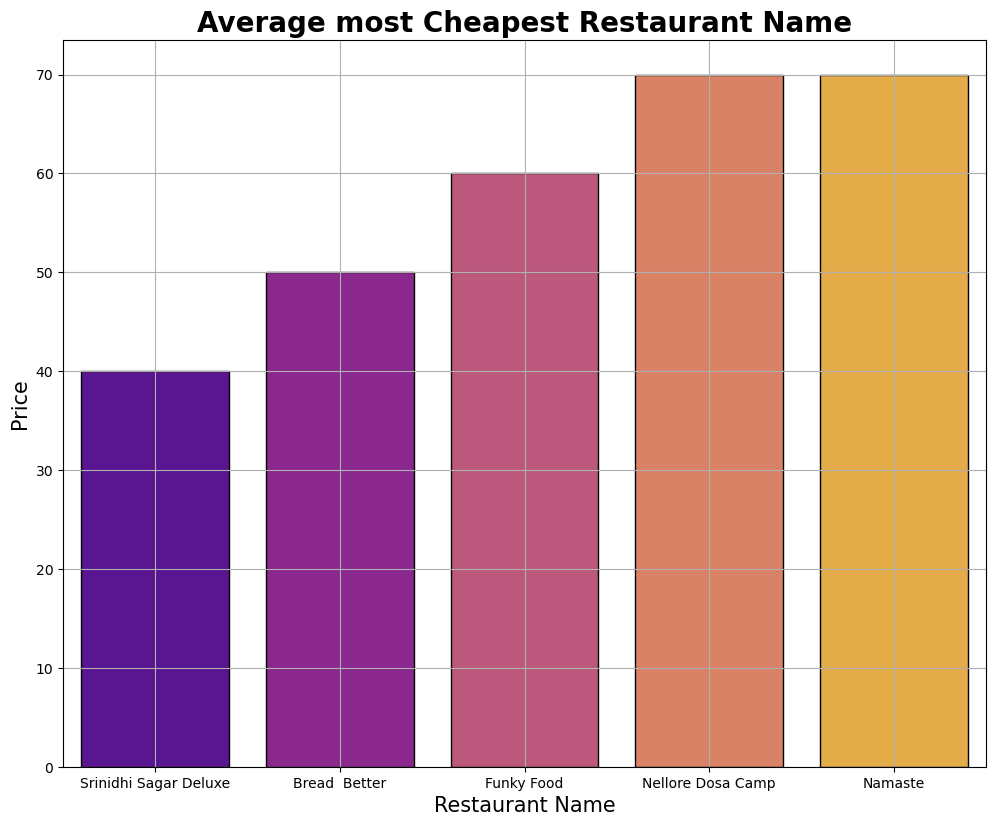

In [328]:
#Q 4. 5 most cheapest restaurants to visit?
avg_most_cheapest=zomato_data.groupby('Restaurant_name')[['Price']].mean().sort_values(by="Price",ascending=True).head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=avg_most_cheapest,y='Price',x='Restaurant_name',palette='plasma',edgecolor='black')
#plt.xticks(rotation=50, ha='right', fontsize=10)
plt.tight_layout()
plt.title("Average most Cheapest Restaurant Name",fontsize=20,fontweight='bold')
plt.xlabel("Restaurant Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

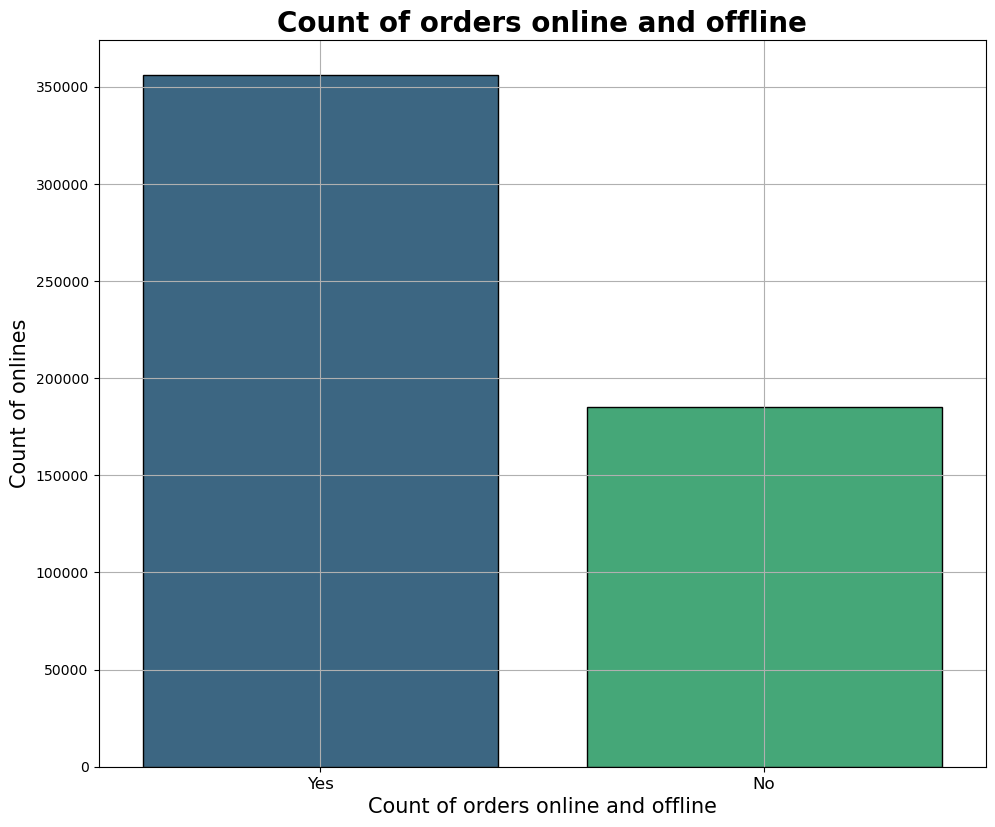

In [329]:
#Q 5. number of people ordered online and offline
online=zomato_data['online_order'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(data=online, palette='viridis',edgecolor='black')
plt.tight_layout()
plt.xlabel("Count of orders online and offline",fontsize=15)
plt.ylabel("Count of onlines",fontsize=15)
plt.title("Count of orders online and offline",fontsize=20,fontweight='bold')
plt.xticks(fontsize=12)
plt.grid()
plt.show()

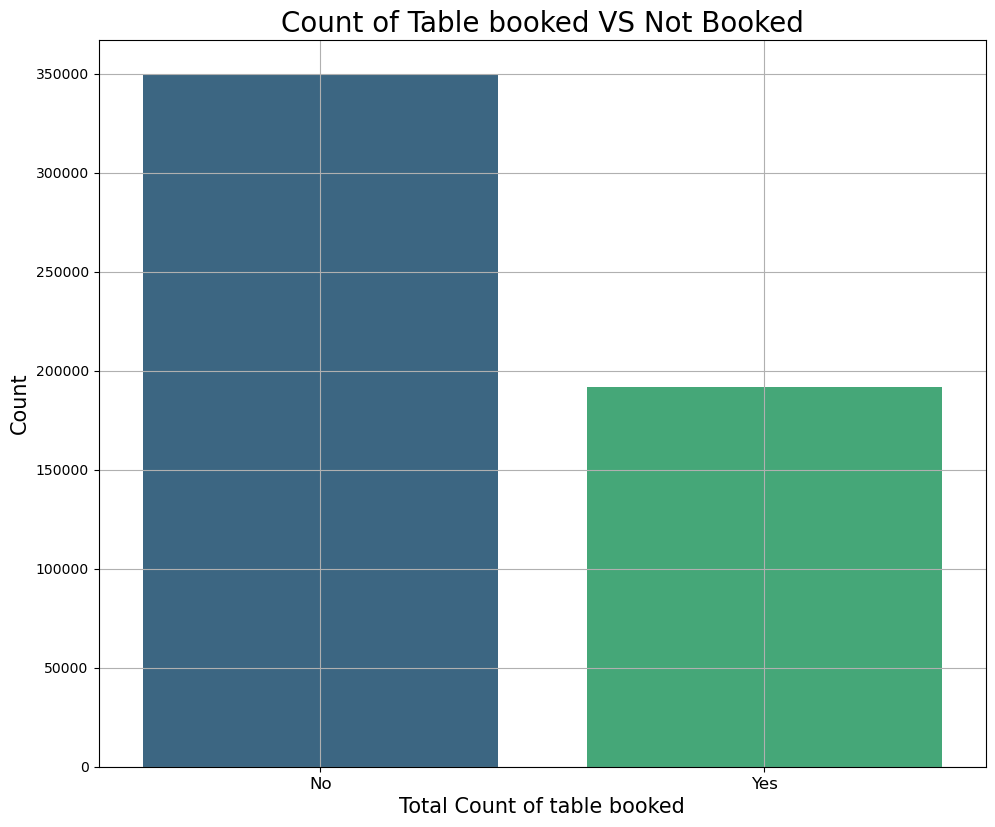

In [330]:
#Q 6. Number of table booked ?
table=zomato_data['book_table'].value_counts() # as per this query we get that less table were booked
plt.figure(figsize=(10,8))
sns.barplot(data=table, palette='viridis')
plt.tight_layout()
plt.xlabel("Total Count of table booked",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Count of Table booked VS Not Booked",fontsize=20)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

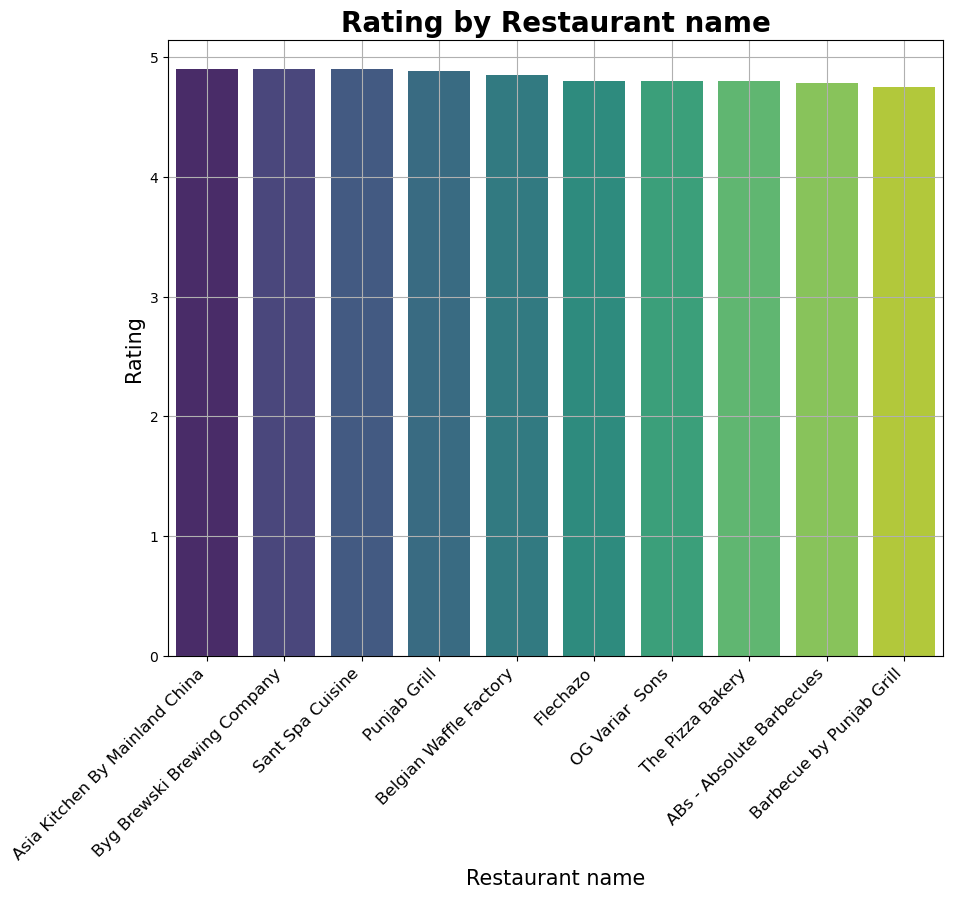

In [331]:
#Q.7  rating wise 5 top restaurants--
highest_rating=zomato_data.groupby('Restaurant_name')[['rate']].mean().sort_values(by='rate',ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x="Restaurant_name",y="rate",data=highest_rating,palette='viridis')
plt.title("Rating by Restaurant name",fontsize=20,fontweight='bold')
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.xlabel("Restaurant name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.grid()
plt.show()

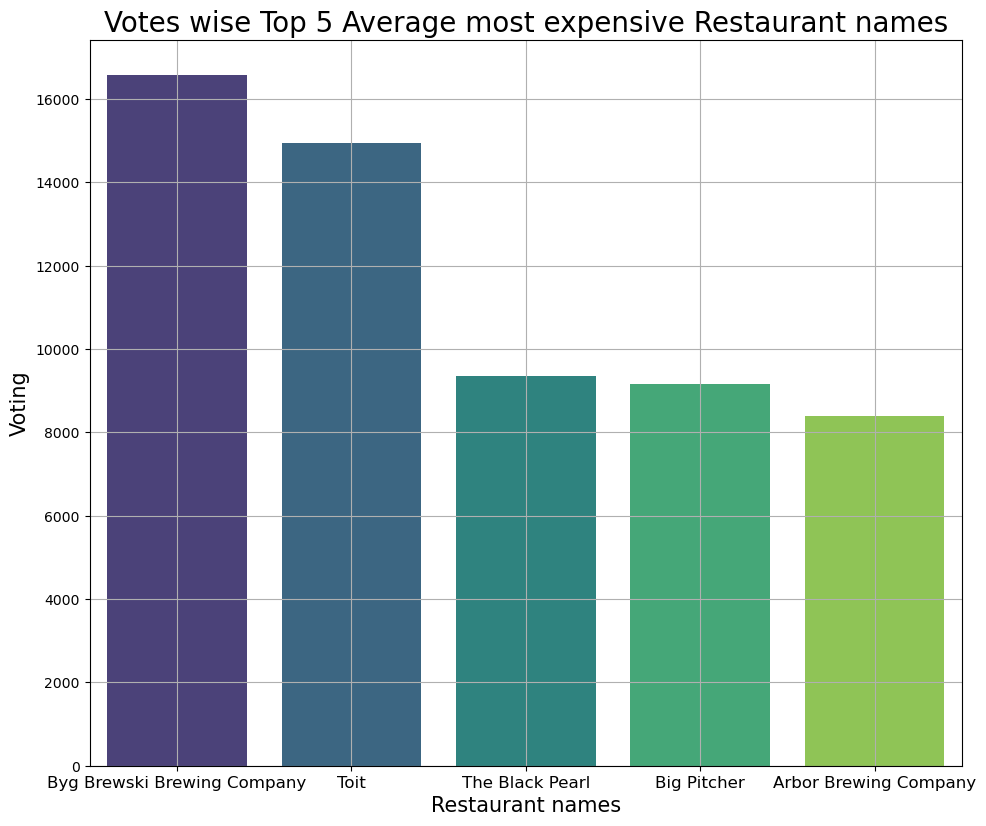

In [332]:
#Q8 Avg 5 top restaurants Votes wise --
highest_rest_votes=zomato_data.groupby('Restaurant_name')[['votes']].mean().sort_values(by='votes',ascending=False).head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=highest_rest_votes,x='Restaurant_name',y='votes',palette='viridis')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.xlabel("Restaurant names",fontsize=15)
plt.ylabel("Voting",fontsize=15)
plt.grid()
plt.title("Votes wise Top 5 Average most expensive Restaurant names",fontsize=20)
plt.show()

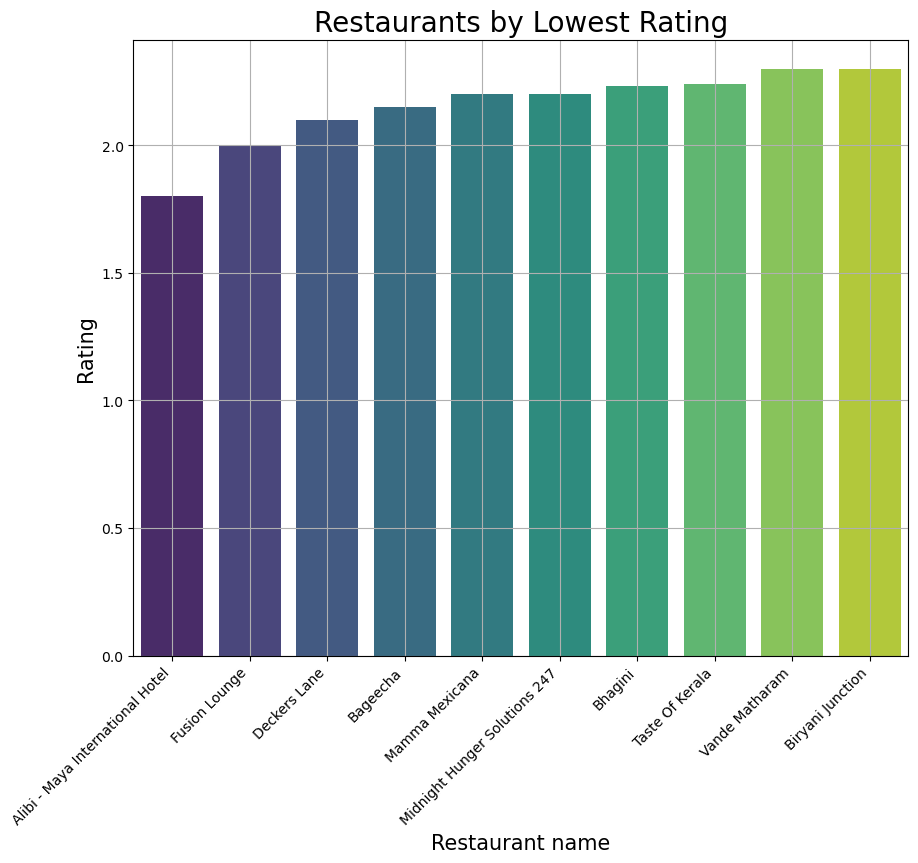

In [334]:
#Q.9  10 highest rating wise restaurants
highest_rating_wise_rest=zomato_data.groupby('Restaurant_name')[['rate']].mean().sort_values(by="rate",ascending=True).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x="Restaurant_name",y="rate",data=highest_rating_wise_rest,palette="viridis")
plt.title("Restaurants by Lowest Rating",fontsize=20)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Restaurant name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.grid()
plt.show()

In [336]:
#Q.10  name 5 restaurants with its most liked dish with most highest price?
exp_food_by_rest_name=zomato_data.loc[zomato_data.groupby(["Restaurant_name","dish_liked"])["Price"].idxmax()].sort_values(by="Price",ascending=False).drop_duplicates(subset='Price')
exp_food_by_rest_name[['Restaurant_name','dish_liked','Price']]

,Restaurant_name,dish_liked,Price
19139,Le Cirque Signature - The Leela Palace,Creme Brulee,6000
40266,Royal Afghan - ITC Windsor,Dal Bukhara,5000
41591,Malties - Radisson Blu,Charcuterie Platter,4500
37715,La Brasserie - Le Meridien,Grilled Lamb,4100
6154,Riwaz - The Ritz-Carlton,Biryani,4000
...,...,...,...
736,Dtink Lab,unknown,80
10649,Nellore Dosa Camp,unknown,70
13922,Funky Food,unknown,60
1604,Bread Better,unknown,50


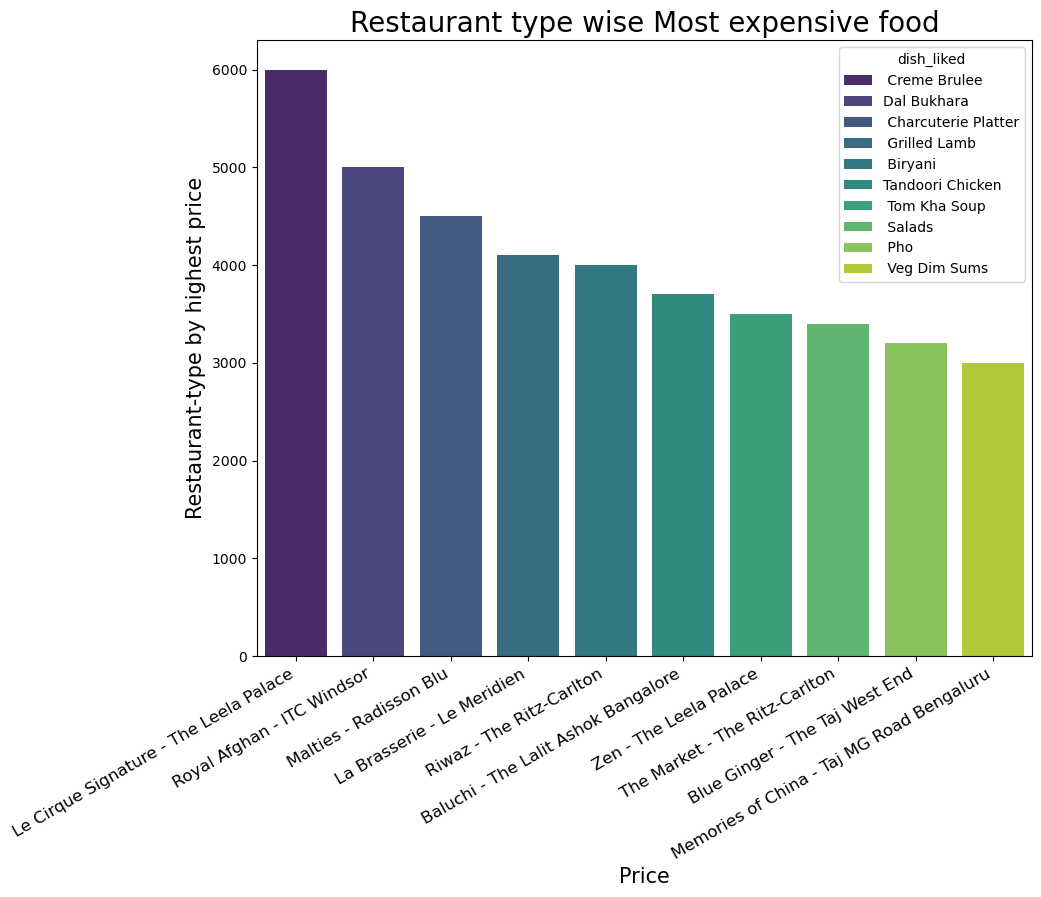

In [337]:
plt.figure(figsize=(10,8))
sns.barplot(x='Restaurant_name',y='Price',hue='dish_liked', data=exp_food_by_rest_name.head(10), palette='viridis')
plt.title("Restaurant type wise Most expensive food",fontsize=20)
plt.xticks(rotation=30,ha='right',fontsize=12)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Restaurant-type by highest price",fontsize=15)
plt.show()

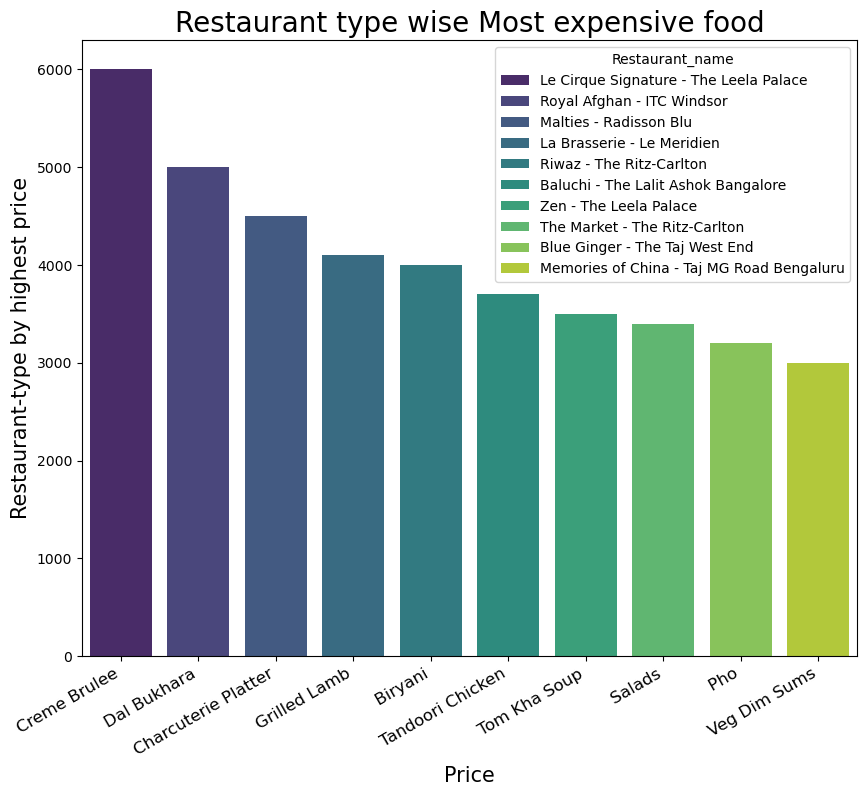

In [338]:
plt.figure(figsize=(10,8))
sns.barplot(x='dish_liked',y='Price',hue='Restaurant_name', data=exp_food_by_rest_name.head(10), palette='viridis')
plt.title("Restaurant type wise Most expensive food",fontsize=20)
plt.xticks(rotation=30,ha='right',fontsize=12)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Restaurant-type by highest price",fontsize=15)
plt.show()

Q.9 rest type wise expensive restaurant?

In [340]:
price_wise_rest_type=zomato_data.groupby('rest_type')[['Price']].mean().sort_values(by="Price",ascending=False).head(5)
price_wise_rest_type

,Price
rest_type,
Fine Dining,2730.654808
Club,2050.857143
Microbrewery,1786.364159
Lounge,1601.824661
Lounge,1598.360656


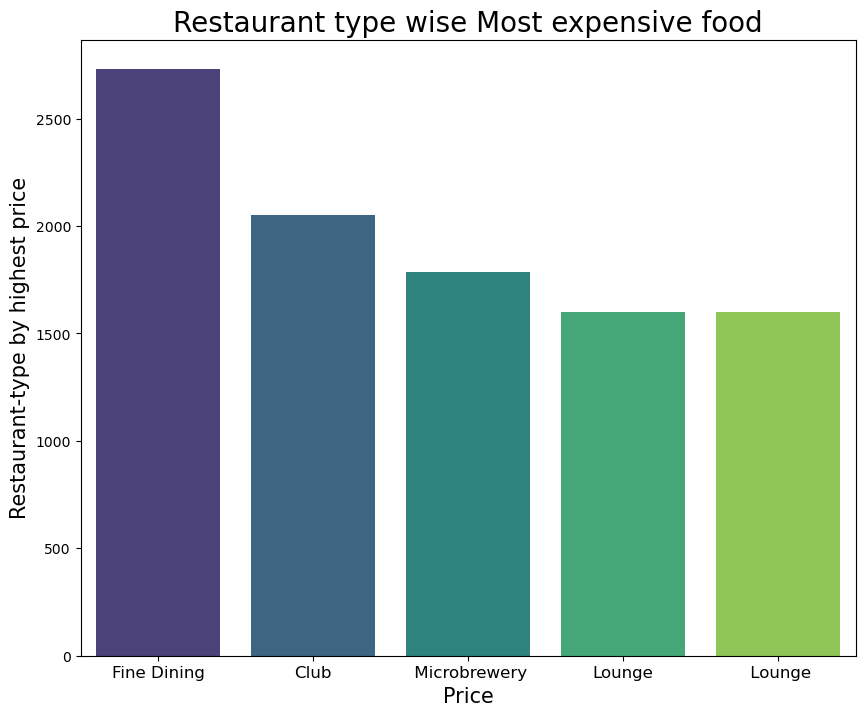

In [341]:
plt.figure(figsize=(10,8))
sns.barplot(x='rest_type',y='Price',hue='rest_type', data=price_wise_rest_type, palette='viridis')
plt.title("Restaurant type wise Most expensive food",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Restaurant-type by highest price",fontsize=15)
plt.show()

Q.10  cheapest restaurant type by Price?

In [343]:
cheap_rest_wise=zomato_data.groupby('rest_type')[['Price']].mean().sort_values(by="Price",ascending=True).head(5)
cheap_rest_wise

,Price
rest_type,
Sweet Shop,229.035874
Sweet Shop,282.034561
Kiosk,284.057971
Mess,285.927734
Dhaba,291.891892


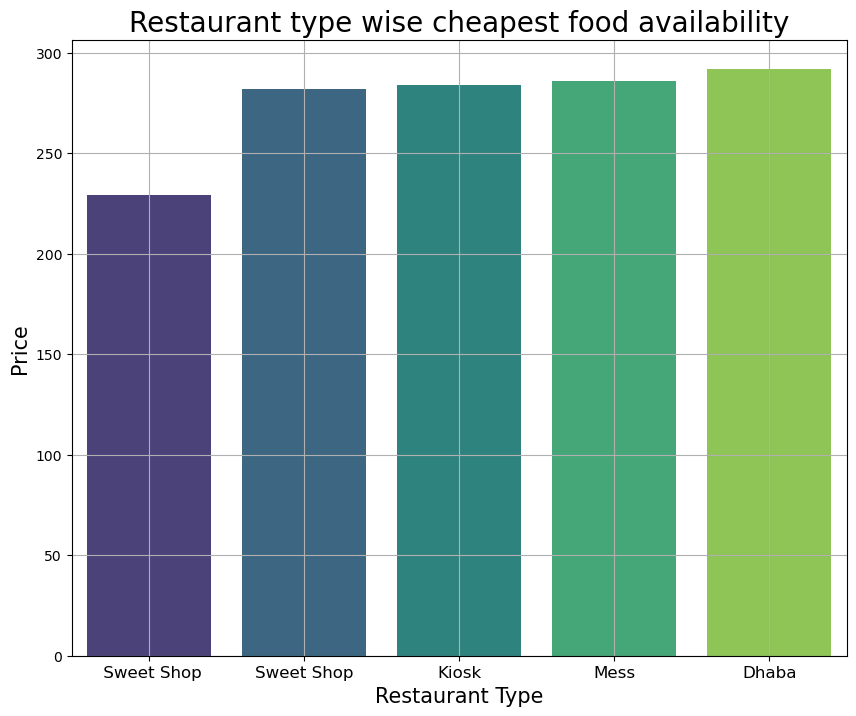

In [344]:
plt.figure(figsize=(10,8))
sns.barplot(x='rest_type',y='Price',hue='rest_type', data=cheap_rest_wise, palette='viridis')
plt.title("Restaurant type wise cheapest food availability",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Restaurant Type",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

Q11. what is the average price for eating in the Cafe AND what is the average price for spending in the Bar AND Quick Bites?

In [346]:
cafe_wise_avg_price=zomato_data[zomato_data['rest_type']=='Cafe'].groupby("rest_type")[["Price"]].mean()
bar_wise_avg_price=zomato_data[zomato_data["rest_type"] =="Bar"].groupby("rest_type")[["Price"]].mean()
Quick_wise_avg_price=zomato_data[zomato_data["rest_type"] =="Quick Bites"].groupby("rest_type")[["Price"]].mean()

In [347]:
#zomato_data['rest_type'].drop_duplicates()
zomato_data['rest_type'].unique()

array(['Casual Dining', 'Cafe', ' Casual Dining', 'Quick Bites', ' Cafe',
       ' Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor', 'Bakery',
       ' Dessert Parlor', 'Pub', 'Takeaway', ' Delivery', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery',
       ' Beverage Shop', ' Sweet Shop', 'Kiosk', 'Food Truck', ' Bar',
       ' Bakery', 'Microbrewery', 'Lounge', 'Food Court', 'unknown',
       'Dhaba', ' Pub', ' Microbrewery', ' Food Court', 'Club',
       ' Irani Cafee', ' Lounge', ' Kiosk', 'Bhojanalya', 'Pop Up',
       ' Mess', ' Meat Shop'], dtype=object)

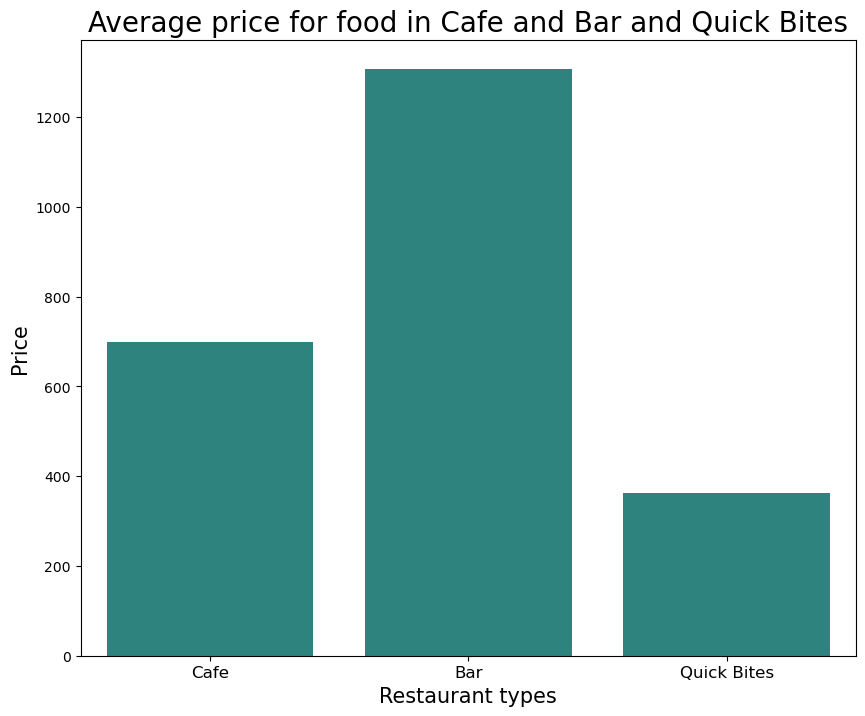

In [348]:
plt.figure(figsize=(10,8))
sns.barplot(x='rest_type',y='Price', hue='rest_type', data=cafe_wise_avg_price, palette='viridis')
sns.barplot(x='rest_type',y='Price', hue='rest_type', data=bar_wise_avg_price, palette='viridis')
sns.barplot(x='rest_type',y='Price', hue='rest_type', data=Quick_wise_avg_price, palette='viridis')

plt.title("Average price for food in Cafe and Bar and Quick Bites",fontsize=20)
plt.xlabel("Restaurant types",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(fontsize=12)
plt.show()
# this chart shows the average highest price to be spent in all three places.

Q12. types of restaurant service type to know what is more popular by count wise?

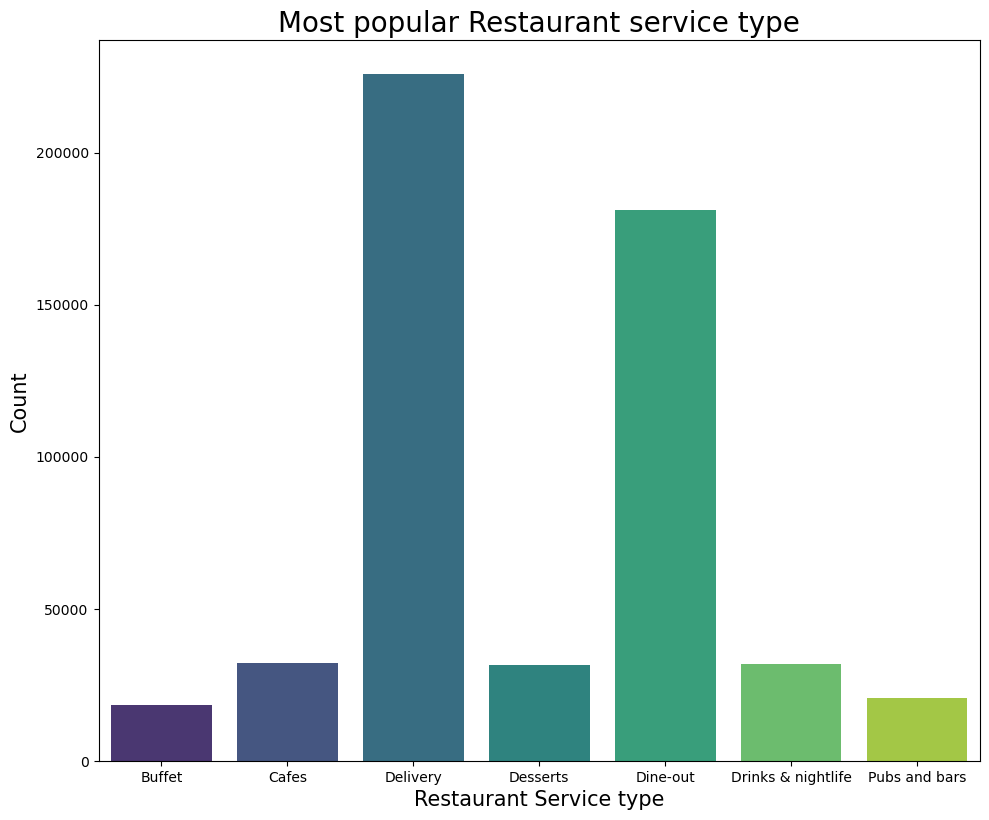

In [350]:
plt.figure(figsize=(10,8))
sns.countplot(x=zomato_data['Rest_service_Type'],palette="viridis")
plt.xlabel("Restaurant Service type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()
plt.title("Most popular Restaurant service type",fontsize=20)
plt.xticks(fontsize=10)
plt.show()

Q13. what is the average price for spending in the Bar?

In [352]:
avg=zomato_data[(zomato_data["rest_type"] =="Bar") | (zomato_data["rest_type"] =="Quick Bites") | (zomato_data["Rest_service_Type"] =="Delivery")]
avg.reset_index().iloc[:,[1,6,8,10,11]].drop_duplicates()

,Restaurant_name,location,dish_liked,Price,Rest_service_Type
0,Addhuri Udupi Bhojana,Banashankari,Masala Dosa,300,Buffet
2,My Tea House,Banashankari,Pasta,600,Cafes
6,My Tea House,Banashankari,Iced Tea,600,Cafes
10,Foodiction,Banashankari,Burgers,500,Delivery
14,Foodiction,Banashankari,Lassi,500,Delivery
...,...,...,...,...,...
279087,Plunge - Sheraton Grand Bengaluru Whitefield H...,Whitefield,unknown,2000,Pubs and bars
279088,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Cocktails,2500,Pubs and bars
279089,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Pizza,2500,Pubs and bars
279090,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Buttermilk,2500,Pubs and bars


In [353]:
avg_types=avg.groupby('rest_type')[['Price']].mean().sort_values(by="Price",ascending=False)
avg_types.drop_duplicates()

,Price
rest_type,
Fine Dining,2307.978723
Club,2000.000000
Lounge,1950.000000
Microbrewery,1636.266667
Microbrewery,1516.666667
Lounge,1427.816901
Bar,1307.091878
Irani Cafee,1300.000000
Pub,1277.192982


In [354]:
bar_wise_avg_price=zomato_data[zomato_data["rest_type"] =="Bar"].groupby("rest_type")[["Price"]].mean()
bar_wise_avg_price

,Price
rest_type,
Bar,1307.091878


Q14. what is the average price for spending in the Quick Bites?

<Axes: xlabel='rest_type'>

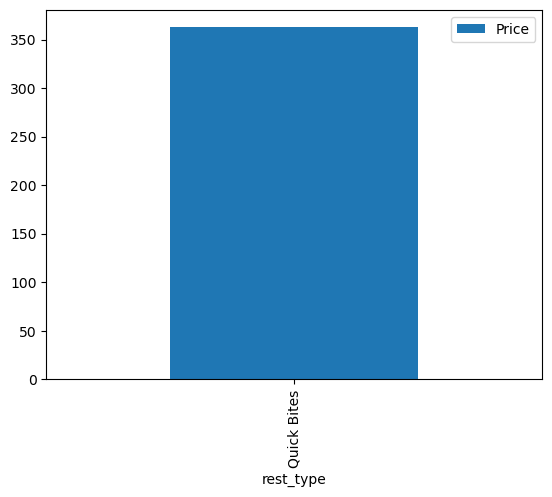

In [356]:
Quick_wise_avg_price=zomato_data[zomato_data["rest_type"] =="Quick Bites"].groupby("rest_type")[["Price"]].mean().plot(kind='bar')
Quick_wise_avg_price

Q15. what is the highest average price for spending in the Rest_service_Type?

<Axes: xlabel='Rest_service_Type'>

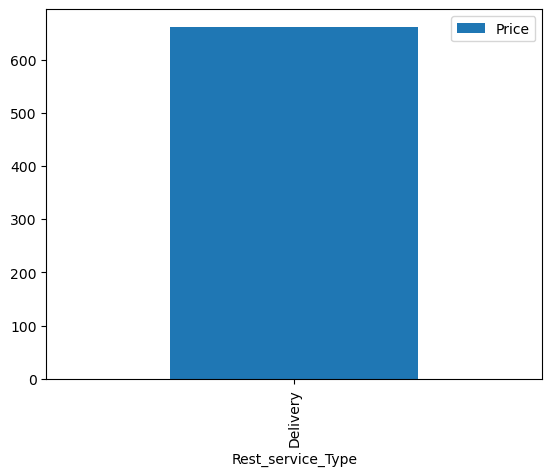

In [358]:
dining_wise_avg_price=zomato_data[zomato_data["Rest_service_Type"] =="Delivery"].groupby("Rest_service_Type")[["Price"]].mean().sort_values(by='Price',ascending=False).head(1).plot(kind='bar')
dining_wise_avg_price

Q.16 Find out the Restaurant service type with the price

In [360]:
rest_service=zomato_data.groupby("Rest_service_Type")[['Price']].mean().sort_values(by='Price',ascending=False).head(5)
rest_service

,Price
Rest_service_Type,
Drinks & nightlife,1434.235604
Buffet,1371.875102
Pubs and bars,1363.590953
Dine-out,886.068459
Cafes,768.193319


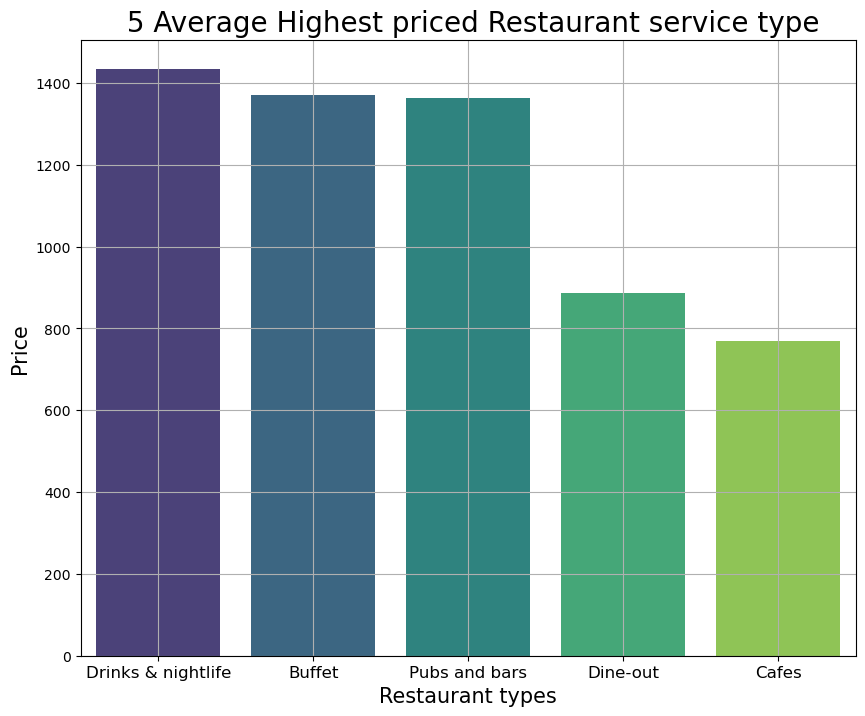

In [361]:
plt.figure(figsize=(10,8))
sns.barplot(x='Rest_service_Type',y='Price',data=rest_service, palette='viridis',)
plt.title(" 5 Average Highest priced Restaurant service type",fontsize=20)
plt.xlabel("Restaurant types",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(fontsize=12)
plt.grid()
plt.show()
#this chart shows the average most expensive place to have food in high to low order.

Q.17 Find out the Restaurant service type with the price

In [363]:
rest_dish_price=zomato_data.groupby(["Restaurant_name","dish_liked"][0])[['Price']].mean().sort_values(by='Price',ascending=False)

rest_dish_price

,Price
Restaurant_name,
Le Cirque Signature - The Leela Palace,6000.0
Royal Afghan - ITC Windsor,5000.0
Malties - Radisson Blu,4500.0
La Brasserie - Le Meridien,4100.0
Alba - JW Marriott Bengaluru,4000.0
...,...
Namaste,70.0
Nellore Dosa Camp,70.0
Funky Food,60.0


In [364]:
rest_dish_price=zomato_data.groupby(["Restaurant_name","dish_liked"][1])[['Price']].mean().sort_values(by='Price',ascending=False).head(25)
rest_dish_price

,Price
dish_liked,
Primavera,6000.0
Pudina Paratha,5000.0
Charcuterie Platter,4500.0
Grilled Lamb,4100.0
Meat Curry,4000.0
Banana Dosa,4000.0
Tandoori Broccoli,4000.0
Tamarind Sorbet,4000.0
Tamatar Ka Shorba,4000.0


In [365]:
zomato_data["Rest_service_Type"].value_counts()

Rest_service_Type
Delivery              225731
Dine-out              180985
Cafes                  32211
Drinks & nightlife     31659
Desserts               31590
Pubs and bars          20560
Buffet                 18455
Name: count, dtype: int64

In [366]:
zomato_data["rest_type"].unique()

array(['Casual Dining', 'Cafe', ' Casual Dining', 'Quick Bites', ' Cafe',
       ' Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor', 'Bakery',
       ' Dessert Parlor', 'Pub', 'Takeaway', ' Delivery', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery',
       ' Beverage Shop', ' Sweet Shop', 'Kiosk', 'Food Truck', ' Bar',
       ' Bakery', 'Microbrewery', 'Lounge', 'Food Court', 'unknown',
       'Dhaba', ' Pub', ' Microbrewery', ' Food Court', 'Club',
       ' Irani Cafee', ' Lounge', ' Kiosk', 'Bhojanalya', 'Pop Up',
       ' Mess', ' Meat Shop'], dtype=object)

In [367]:
Q.18  Name the restaurant with best cuisine?

Object `cuisine` not found.


In [368]:
cuisines=zomato_data.groupby('cuisines')[['Price']].mean().sort_values(by="Price",ascending=False).head(5)
cuisines

,Price
cuisines,
Cantonese,2800.000000
Spanish,2216.216216
French,2107.142857
Japanese,2093.017751
Sushi,2000.000000


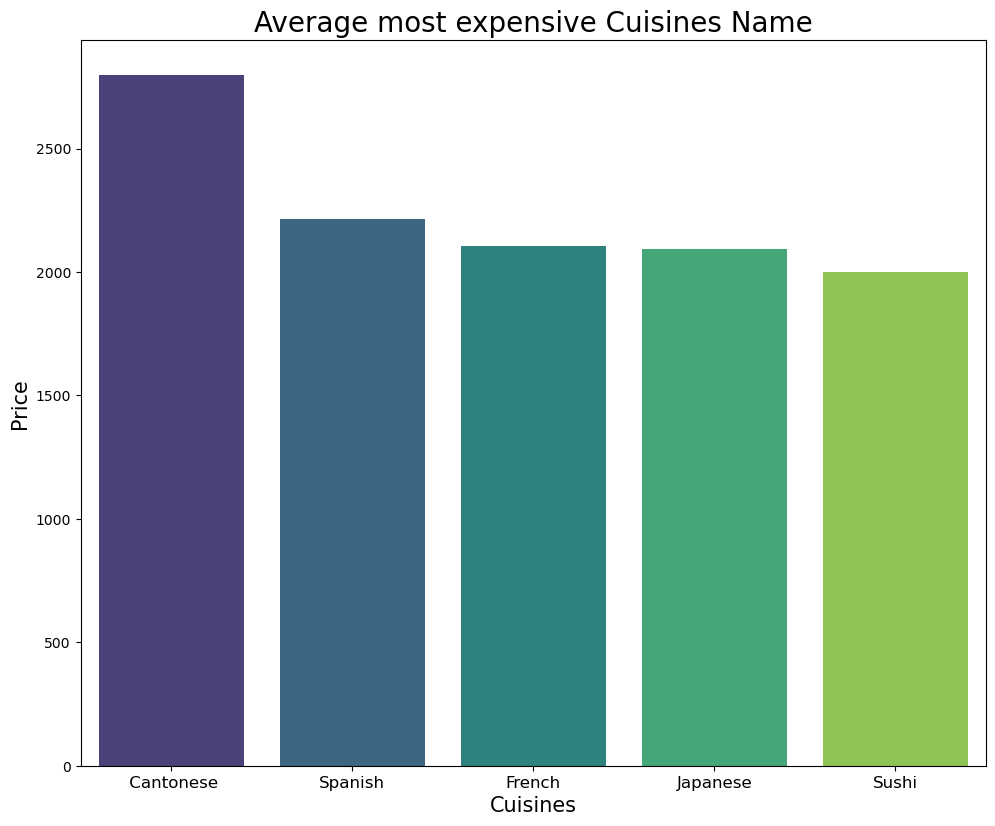

In [369]:
plt.figure(figsize=(10,8))
sns.barplot(data=cuisines,y='Price',x='cuisines',palette='viridis')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.title("Average most expensive Cuisines Name",fontsize=20)
plt.xlabel("Cuisines",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

Q.19 Name the restaurant type "Casual Dining" which offers "Buffet" service and sort the data to see most
expensive restaurants ones first ?

In [371]:
buffet_dining=zomato_data[(zomato_data['Rest_service_Type']=="Buffet") & (zomato_data["rest_type"]=="Casual Dining")].sort_values(by="Price",ascending=False)
buffet_dining

,Restaurant_name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Price,Rest_service_Type,Comments
42192,Citrus Cafe - Lemon Tree Premier,No,Yes,3.9,183,Ulsoor,Casual Dining,Breakfast Buffet,South Indian,2200,Buffet,Rated 4.0 RATEDn Food is good and delicious i...
11566,Citrus Cafe - Lemon Tree Premier,No,No,3.9,183,Ulsoor,Casual Dining,Omelette,South Indian,2200,Buffet,Rated 4.0 RATEDn Food is good and delicious i...
42192,Citrus Cafe - Lemon Tree Premier,No,Yes,3.9,183,Ulsoor,Casual Dining,Chips,Continental,2200,Buffet,Rated 4.0 RATEDn Food is good and delicious i...
42192,Citrus Cafe - Lemon Tree Premier,No,Yes,3.9,183,Ulsoor,Casual Dining,Chips,South Indian,2200,Buffet,Rated 4.0 RATEDn Food is good and delicious i...
42192,Citrus Cafe - Lemon Tree Premier,No,Yes,3.9,183,Ulsoor,Casual Dining,Pasta,North Indian,2200,Buffet,Rated 4.0 RATEDn Food is good and delicious i...
...,...,...,...,...,...,...,...,...,...,...,...,...
8294,Shri Madhuram,No,No,3.9,371,HSR,Casual Dining,Vada,South Indian,400,Buffet,"Rated 4.0 ""RATEDn Tamil breakfast lovers can ..."
8294,Shri Madhuram,No,No,3.9,371,HSR,Casual Dining,Vada,North Indian,400,Buffet,"Rated 4.0 ""RATEDn Tamil breakfast lovers can ..."
8294,Shri Madhuram,No,No,3.9,371,HSR,Casual Dining,Coffee,South Indian,400,Buffet,"Rated 4.0 ""RATEDn Tamil breakfast lovers can ..."
8294,Shri Madhuram,No,No,3.9,371,HSR,Casual Dining,Coffee,North Indian,400,Buffet,"Rated 4.0 ""RATEDn Tamil breakfast lovers can ..."


In [372]:
# plt.figure(figsize=(4,2))
# sns.barplot(x='Rest_service_Type',y='Price',hue='Rest_service_Type', palette='viridis',data=buffet_dining)
# sns.barplot(x='rest_type',y='Price',hue='rest_type',palette='viridis', data=buffet_dining)
# plt.title("Restaurant type and restaurant service type")
# plt.xlabel("Rest type")
# plt.ylabel("Price")
# plt.show()

In [373]:
zomato_data.head(1)

,Restaurant_name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Price,Rest_service_Type,Comments
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Pasta,North Indian,800,Buffet,Rated 4.0 RATEDn A beautiful place to dine in...


Q.20 Name the restaurant type Cafer which offers delivery services?

In [375]:
cafe=zomato_data[(zomato_data['rest_type']=="Cafe")].head(5)
cafe

,Restaurant_name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Price,Rest_service_Type,Comments
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Churros,Cafe,800,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Churros,Mexican,800,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Churros,Italian,800,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cannelloni,Cafe,800,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cannelloni,Mexican,800,Buffet,"Rated 3.0 ""RATEDn Ambience is not that good e..."


In [376]:
cafe=zomato_data[(zomato_data['rest_type']!="Cafe")].reset_index()
cafe.iloc[:,[1,6]].value_counts()

Restaurant_name         location             
Hammered                Cunningham Road          2380
Berrylicious Cafe       MG Road                  2065
Green Theory            Residency Road           2058
Stoner                  Koramangala 5th Block    1764
Fava                    Lavelle Road             1764
                                                 ... 
Grab n Dash             New BEL Road                1
Arya Vysya Refreshment  Basavanagudi                1
Brahmins Thatte Idli    Basaveshwara Nagar          1
Gopi Ice Creams         Banashankari                1
Rotti Mane              Vijay Nagar                 1
Name: count, Length: 11600, dtype: int64

In [ ]:
cafe1=zomato_data[(zomato_data["Rest_service_Type"]!="Delivery") | (zomato_data["Rest_service_Type"]!="Buffet")].mean()
cafe1

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='rest_type',y='Price',hue='rest_type', data=cafe1, palette='viridis')
plt.title("Restaurant type and restaurant service type")
plt.xlabel("Rest service Type")
plt.ylabel("Price")
plt.show()

In [ ]:
delivery_cafe=zomato_data[(zomato_data["Rest_service_Type"]!="Delivery")].head(5)
delivery_cafe

In [ ]:
delivery_cafe=zomato_data[(zomato_data["Rest_service_Type"]=="Delivery")].head(5)
delivery_cafe

In [ ]:
plt.figure(figsize=(2,3))
sns.barplot(x='rest_type',y='Price',hue='rest_type', data=delivery_cafe, palette='viridis')
plt.title("Restaurant type and restaurant service type")
plt.xlabel("Rest service Type")
plt.ylabel("Price")
plt.show()

Q.21 Name the restaurant type "Bar" in "Banashankari" location?

In [ ]:
price_votes=zomato_data.groupby('votes')[['Price']].mean().sort_values(by="Price",ascending=False).head(10)
price_votes

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(x='votes',y='Price', data=price_votes, palette='viridis')
plt.title("Restaurant type and restaurant service type")
plt.xlabel("Rest service Type")
plt.ylabel("Price")
plt.grid()
plt.show()

Q.22 Name and count highest to lowest price?

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=All_data.head(10),palette='viridis')
plt.title("Cuisines by Highest Count Wise")
plt.xticks(rotation=45,ha='right')
plt.grid()
plt.show()

In [ ]:
zomato_data.head()

Q.22 Name the restaurant type "Bar" in "Banashankari" location and which offers Dine out option?

In [ ]:
zomato_data[(zomato_data["rest_type"] =="Bar") & (zomato_data["location"]=="Banashankari") & (zomato_data["Rest_service_Type"]=="Dine-out")].head(5)

In [ ]:
import seaborn as sns

Q.19 find out the total count number of the below things.
1. restaurant service type-- dineout
2. restaurant service type-- delivery
3. restaurant service type-- cafes
4. restaurant service type-- drinks & nightlife
5. restaurant service type --Pubs and bars
6. restaurant service type-- Buffet
7. restaurant service type-- Dessert

In [ ]:
#zomato_data["location"].unique()

Q. 10 Highest restaurant count per location wise?

In [ ]:
highest_count = zomato_data.groupby('location')[['Restaurant_name']].count().sort_values("Restaurant_name",ascending=False).head(10)
highest_count

In [ ]:
lowest_count = zomato_data.groupby('location')[['Restaurant_name']].count().sort_values("Restaurant_name",ascending=True).head(10)
lowest_count

Q.23 Find out the count of restaurant types in location?

In [ ]:
location_wise_rest = zomato_data.groupby('location').count().sort_values("location",ascending=False).head(10)
location_wise_rest

In [ ]:
most_pop_cuisines=zomato_data["cuisines"].value_counts().head(10)
most_pop_cuisines

Q24. Find out Count of cuisines?

In [ ]:
 count_of_cusines=zomato_data['cuisines'].value_counts()
count_of_cusines

In [ ]:
cuisine_count = zomato_data.groupby('cuisines').count().sort_values("Price",ascending=False).head(10)
cuisine_count
# as per this we see North Indian is most easily found in all restaurants.

 Q.25 Find out the restaurant name where cuisine is North Indian in BTM location and sort it descending by price to know most expensive ?

In [ ]:
zomato_data[(zomato_data["location"]=="BTM") & (zomato_data["cuisines"]=="North Indian")].sort_values(by="Price",ascending=False).head(10)

Q.26 Find out the restuarants names where Fast Food is offered in BTM location and sort it descending by price
to know most expensive ?

In [ ]:
zomato_data[(zomato_data["location"]=="BTM") & (zomato_data["cuisines"]=="Fast Food")].sort_values(by="Price",ascending=False)

Q.27 Find out the restuarants name where cuisine is South Indian in BTM location and sort it descending by price
to know most expensive ?

In [ ]:
zomato_data[(zomato_data["location"]=="BTM") & (zomato_data["cuisines"]=="South Indian")].sort_values(by="Price",ascending=False)

Q.28 Find out the restuarants name where Biryani is offered in BTM location and sort it descending by price
to know most expensive Biryani restaurants?

In [ ]:
zomato_data[(zomato_data["location"]=="BTM") & (zomato_data["cuisines"]=="Biryani")].sort_values(by="Price",ascending=False)

Q.29 Find out the 10 cuisines names which are most expensive in average ?

In [ ]:
avg_most_exp_dish_cuisines_wise=zomato_data.groupby("cuisines")[["Price"]].mean().sort_values(by="Price",ascending=False).head(10)

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='cuisines',y='Price',data=avg_most_exp_dish_cuisines_wise,palette='viridis')
plt.title("Restaurant name wise cheapest food",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Cuisines",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

Q.30 Find out the 10 cuisines names which are cheapest in average ?

In [ ]:
zomato_data.groupby("cuisines")[["Price"]].mean().sort_values(by="Price",ascending=True).head(10)

Q.31 Find out the 10 dish liked names which are most expensive in average ?

In [ ]:
dish_liked=zomato_data.groupby("dish_liked")[["Price"]].mean().sort_values(by="Price",ascending=False).head(10)

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='dish_liked',y='Price',data=dish_liked,palette='viridis')
plt.title("Cuisines name wise cheapest food",fontsize=20)
plt.xticks(fontsize=10)
plt.xlabel("Dish Liked",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.tight_layout()
plt.grid()

plt.show()

Q.32 Find out the 10 dish liked names which are cheapest in average ?

In [ ]:
cheapest_dish=zomato_data.groupby("dish_liked")[["Price"]].mean().sort_values(by="Price",ascending=True).head(10)

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x='dish_liked',y='Price',data=cheapest_dish,palette='viridis')
plt.title("Restaurant name wise cheapest food")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

Q.33 Find out the average price for each locations to know which one is costly and cheap ?

In [ ]:
costly=zomato_data.pivot_table(index=None,columns='location',values='Price', aggfunc="mean")
costly

Q.34 Find out the average price for each restaurant to know which one is costly and cheap ?

In [ ]:
zomato_data.pivot_table(index=None,columns='rest_type',values='Price', aggfunc="mean")

Q.35 Find out the average price for dish liked wise to know which one is costly and cheap?

In [ ]:
zomato_data.pivot_table(index=None,columns='dish_liked',values='Price', aggfunc="mean")

Q.36 Find out the average price for cuisines wise to know which one is costly and cheap?

In [ ]:
zomato_data.pivot_table(index=None,columns='cuisines',values='Price', aggfunc="mean")

Q.37 to find out sum of highest and lowest revenue generating locations ?

In [ ]:
zomato_data.pivot_table(index=None,columns='location',values='Price', aggfunc="sum")

Q.38 find out name cuisines and rating by price top 20

In [ ]:
top20=zomato_data.groupby(['Restaurant_name','cuisines','rate'])[['Price']].mean().sort_values(by="Price",ascending=False).head(20)
top20

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x='Restaurant_name',y='Price',data=top5,palette='viridis')
plt.title("Most Expensive Restaurant names")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(x='cuisines',y='Price',data=top5,palette='viridis')
plt.title("Cuisines wise Most expensive Restaurant")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(x='cuisines',y='rate',data=top5,palette='viridis')
plt.title("Cusines wise highest Rating Restaurant")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(x='Restaurant_name',y='rate',data=top5,palette='viridis')
plt.title("Restaurant name wise highest Rating")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

Q.39 find out location wise price min max mean, count all in one?

In [ ]:
location_wise_price=zomato_data.groupby("location")["Price"].agg(['mean', 'min', 'max', 'count']).sort_values(by="location",ascending=False).head(10)
loc_wise=location_wise_price.drop('unknown')
loc_wise

In [ ]:
plt.figure(figsize=(6,8))
loc_wise[['mean', 'min', 'max', 'count']].plot(kind='bar',subplots=True,figsize=(8, 8), layout=(2, 2),legend=False)
plt.suptitle('Location-wise Aggregation')
fontsize=5
plt.tight_layout()
plt.show()

Q. 35 Find out all the bar location in Banashankari?

In [ ]:
zomato_data[(zomato_data['location']=='BTM') & (zomato_data['cuisines']=='Biryani')]

In [ ]:
bar_location=zomato_data[(zomato_data["rest_type"] =="Bar") & (zomato_data["location"]=="Banashankari")].head(5)
bar_location

Q. 39 find the average, minimum costing, maximum costing and total count of  5 restaurant type?

In [ ]:
rest_type1=zomato_data.groupby("rest_type")["Price"].agg(['mean', 'min', 'max', 'count'])
rest_type1.head(5)

In [ ]:
rest_type1.head(5)[['mean', 'min', 'max']].plot(kind='bar',subplots=True,figsize=(10, 8), layout=(2, 2),legend=False)
plt.suptitle('Location-wise Aggregation')
plt.tight_layout()
plt.show()

In [ ]:
pip install folium

In [ ]:
import folium
import pandas as pd

Q. 40 locate the locatin where prices are high?

In [ ]:
exp=zomato_data.groupby('location')[['Price']].mean().sort_values(by="Price",ascending=False)
exp

In [ ]:
restaurant_city = folium.Map(location=[12.9716,77.5946],zoom_start=5)
folium.Choropleth(
    geo_data="boundary.geojson",
    data=zomato_data,
    columns=["location","Price"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    legend_name="restaurant locations"
).add_to(restaurant_city)

folium.GeoJson(
    "boundary.geojson",
    name="city",
    tooltip=folium.GeoJsonTooltip(fields=["name"],aliases=["city"])
).add_to(restaurant_city)

restaurant_city.save("restaurant_loc.html")

restaurant_city

Q.41 what are the restaurants which order online?

In [ ]:
zomato_data[zomato_data["online_order"]=="Yes"]

In [ ]:
zomato_data['rate']=zomato_data['rate'].round(1)



In [ ]:
zomato_data['rate'].unique()

In [ ]:
rating_wise=zomato_data.groupby(["rate","location"])[["Price"]].mean().sort_values(by="rate",ascending=True).head(10)
rating_wise

In [ ]:
top_loc=zomato_data.groupby("location")["rate"].sum().nlargest(10).index
df_filter=zomato_data[zomato_data["location"].isin(top_loc)]
df_filter
plt.figure(figsize=(10,8))
sns.barplot(x='rate',y='Price',data=df_filter,hue='location', palette='viridis')
plt.title("Top 10 most-rated locations wise rating")
plt.grid()
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

Q 42. what is the average cheapest price with rating and location?

In [ ]:
avg_cheap_price=zomato_data.groupby(["rate","location"])[["Price"]].mean().sort_values(by="Price",ascending=True).head(10)
avg_cheap_price

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='location',y='Price',data=avg_cheap_price, hue='rate',palette='viridis',width=1.2)
plt.title("Most Cheapest Restaurant by Price",fontsize=20)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.xlabel("Location",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

43. As per location and rating cheapest priced food is available at following price:-

In [ ]:
avg_most_exp=zomato_data.groupby(["location","rate"])[["Price"]].mean().sort_values(by="Price",ascending=False)

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='rate',y='Price',data=avg_most_exp.head(10), hue='location', palette='viridis')
plt.title("Avg Most expensive Restaurant names")
plt.grid()
plt.show()

In [ ]:
loc_wise_exp=zomato_data.groupby(["location","rate"])[["Price"]].mean().sort_values(by="location",ascending=False)
loc_wise_exp=loc_wise_exp.drop("unknown")
loc_wise_exp

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='location',y='Price',data=loc_wise_exp.head(20),palette='viridis')
plt.title("Most Expensive location wise names")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()
# from this chart we found most minimum priced restaurant locations

Q 44 what are the maximum priced locations with rating?

In [ ]:
max_priced=zomato_data.groupby(["rate","location"])[["Price"]].max().sort_values(by="Price",ascending=False)
max_priced

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='rate',y='Price',data=max_priced,palette='viridis',marker='*',s=200,color='red',alpha=1)
plt.title("Most maximum priced Restaurant Rating",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='location',y='Price',data=max_priced,palette='viridis')
plt.title("Location wise maximum Priced Restaurants",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Location",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

Q 45. what is the average highest price with rating and location?

In [ ]:
location_price=zomato_data.groupby(["cuisines","location"])[["Price"]].mean().sort_values(by="Price",ascending=False)

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x='cuisines',y='Price',data=location_price.head(10),palette='viridis')
plt.title("Most Expensive priced Cousines names",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Cuisines",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(18,12))
sns.barplot(x='location',y='Price',data=location_price.head(20),palette='viridis')
plt.title("Most Expensive Location names wise",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Location",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

In [ ]:
print(zomato_data.describe())
#count means we get the airthmetic

In [ ]:
#zomato_data.corr().style.background_gradient()

In [ ]:
zomato_data.shape

Q.46 Find the most liked dish with sum of its price highest in order?

In [ ]:
most_dish_liked= zomato_data[zomato_data['dish_liked']!="unknown"].groupby('dish_liked')['Price'].sum().reset_index().sort_values(by="Price",ascending=False).assign(Price=lambda x: x['Price'].astype(int))
most_dish_liked

In [ ]:
fig = px.bar(most_dish_liked.head(10), x='dish_liked', y='Price') #most liked dish
fig.show()

In [ ]:
fig = px.bar(most_dish_liked.tail(10), x='dish_liked', y='Price')
fig.show()

In [ ]:
zomato_data["Price"].mean() #average price

Q.47 Show the price from High to low between 650-6000 range to know the pattern of price?

In [ ]:
price_under_6000=zomato_data[(zomato_data["Price"] >650) | (zomato_data["Price"]<6000)].sort_values(by="Price",ascending=False).head(1000)

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Price',y='Price',data=price_under_6000,palette='viridis')
plt.title("Price between 650 to 6000 Descending")
plt.grid()
plt.xticks(fontsize=10)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

In [ ]:
price_under_6000=zomato_data[(zomato_data["Price"] >650) | (zomato_data["Price"]<6000)].sort_values(by="Price",ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x='Price',y='Price',data=price_under_6000,palette='viridis')
plt.title("Price between 650 to 6000 Descending", fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

Q.48 Show the price range under 650 to know the pattern of price?

In [ ]:
price_under_650=zomato_data[(zomato_data["Price"] >650)]
plt.figure(figsize=(10,8))
sns.barplot(x='Price',y='Price',data=price_under_650,palette='viridis')
plt.title("Price under 650", fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

Q. 49 What are the most liked dish where table was booked

In [ ]:
most_liked=zomato_data.groupby(["book_table","dish_liked"])[["Price"]].mean().sort_values(by="Price",ascending=False)
most_liked

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='book_table',y='Price',data=most_liked,palette='viridis')
plt.title("Price wise Table booked",fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.xlabel("Table booked Yes or No",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.show()

plt.figure(figsize=(12,10))
sns.barplot(x='dish_liked',y='Price',data=most_liked.head(10),palette='viridis')
plt.title("Price wise Dish Liked",fontsize=15,fontweight='bold')
plt.xticks(fontsize=8)
plt.xlabel("Liked Dish",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.tight_layout()
plt.show()

Q46.What is the total amount for restaurant type casual dining for revenue ?

In [ ]:
rest=zomato_data[zomato_data["rest_type"] =="Casual Dining"].groupby("rest_type")[["Price"]].sum()
rest

Q.50. find the all the bars in Banashankari location.?

In [ ]:
bar_location=zomato_data[(zomato_data["rest_type"] =="Bar") & (zomato_data["location"]=="Banashankari")].reset_index()
bar_location.iloc[:,[0,1,6,7]]

Q 51. Find the location named Banashankari which offers online orders?

In [ ]:
location_online=zomato_data[(zomato_data["location"]=="Banashankari") & (zomato_data["online_order"]=="Yes")].reset_index()
location_online.iloc[:,[0,1,6]]


Q52. Find the location named Banashankari which offers offline orders?

In [ ]:
offline=zomato_data[(zomato_data["location"]=="Banashankari") & (zomato_data["online_order"]=="No")].reset_index()
offline.iloc[:,[0,1,6]]

In [ ]:
max_loc=zomato_data.groupby('dish_liked')['location'].max().head(5)
max_loc

In [ ]:
#Q. 53 find out location wise price cost?
location_wise=zomato_data.groupby('location')[['Price']].mean().sort_values(by="Price",ascending=False).head(5)

plt.figure(figsize=(10,8))
sns.barplot(data=location_wise,x='location',y='Price')
plt.title("Location wise highest Price",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Location",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

In [ ]:
#Cheapest Restaurants location wise
location_wise=zomato_data.groupby('location')[['Price']].mean().sort_values(by="Price",ascending=True).head(5)

plt.figure(figsize=(10,8))
sns.barplot(data=location_wise,x='location',y='Price')
plt.grid()
plt.title("Location wise Price lowest ",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Location",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

---Observation---
Analyzed the Zomato dataset (77k+ records) using end-to-end exploratory data analysis (EDA). Cleaned and prepared the data by handling missing values and standardizing fields. Uncovered key insights such as North Indian & Chinese as the most popular cuisines, and Koramangala & Whitefield as major food hubs. 

----------------------End of the Project---------------------------------
-------------------------------------------------------------------------